In [1]:
import cv2
import numpy as np

In [2]:
# loading images and converting them to numpy array
# for X_train
X_train_lst = []
for i in range(1, 17):
    img = cv2.imread(f"./train/{i}.jpg")
    img = cv2.resize(img, (32, 32))
    img_np = np.array(img)
    flat_array = img_np.reshape(img_np.shape[0] * img_np.shape[1] * img_np.shape[2])
    X_train_lst.append(flat_array)
    
X_train = np.array(X_train_lst)
print("The shape of X_train is ",X_train.shape)

The shape of X_train is  (16, 3072)


In [3]:
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1])
print("The shape of y_train is ", y_train.shape)

The shape of y_train is  (16,)


In [4]:
# for X_test
def test_data(number_of_images):
    X_test_lst = []
    for i in range(1,number_of_images+1):
        img = cv2.imread(f"./test/{i}.jpg")
        img = cv2.resize(img, (32, 32))
        img_np = np.array(img)
        flat_array = img_np.reshape(img_np.shape[0] * img_np.shape[1] * img_np.shape[2])
        X_test_lst.append(flat_array)

    X_test = np.array(X_test_lst)

    return X_test

X_test = test_data(4)

# for y_test
y_test = np.array([0,0,1,1])

In [5]:
class KNN:


    def __init__(self, k, problem: int=0, metric: int=0):
        """
            Parameters
            ----------
            k: Number of nearest self.neighbors
            problem: Type of learning
            0 = Regression, 1 = Classification
            metric: Distance metric to be used. 
            0 = Euclidean, 1 = Manhattan
        """
        self.k = k
        self.problem = problem
        self.metric = metric

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):

        m = self.X_train.shape[0]
        n = X_test.shape[0]
        y_pred = []

        # Calculating distances  
        for i in range(n):  # for every sample in X_test
            distance = []  # To store the distances
            for j in range(m):  # for every sample in X_train
                if self.metric == 0:
                    d = (np.sqrt(np.sum(np.square(X_test[i,:] - self.X_train[j,:]))))  # Euclidean distance
                else:
                    d = (np.absolute(X_test[i, :] - self.X_train[j,:]))  # Manhattan distance
                distance.append((d, y_train[j]))    
            distance = sorted(distance) # sorting distances in ascending order

            # Getting k nearest neighbors
            neighbors = []
            for item in range(self.k):
                neighbors.append(distance[item][1])  # appending K nearest neighbors
                
            # Making predictions
            if self.problem == 0:
                y_pred.append(np.mean(neighbors))  # For Regression
            else:
                # For Classification
                votes = 0
                for i in range(0, self.k):
                    if neighbors[i] == 1:
                        votes = votes+1
                if (votes/self.k)*100 >= 50:
                    y_pred.append(1)
                else:
                    y_pred.append(0)
        return y_pred

In [6]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)*100
  return accuracy

In [7]:
# for K=3
knn = KNN(3,1,0)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("y_pred: ", y_pred)
print("Accuracy", accuracy(y_test, y_pred))

y_pred:  [1, 0, 0, 0]
Accuracy 25.0


In [8]:
# for K=5
knn = KNN(5,1,0)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("y_pred: ", y_pred)
print("Accuracy", accuracy(y_test, y_pred))

y_pred:  [0, 0, 0, 0]
Accuracy 50.0


In [9]:
# for K=7
knn = KNN(7,1,0)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("y_pred: ", y_pred)
print("Accuracy", accuracy(y_test, y_pred))

y_pred:  [0, 0, 0, 0]
Accuracy 50.0


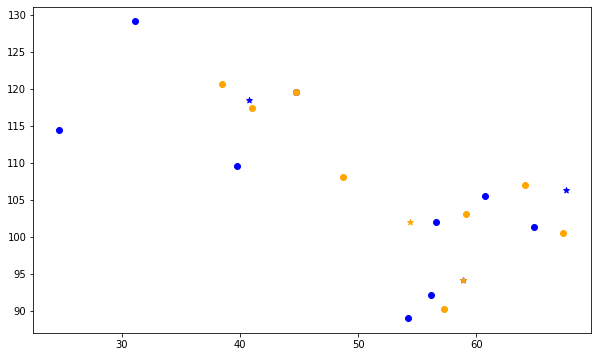

In [10]:

avg_intense_train = [np.mean(x) for x in X_train]
std_deviation_train = [np.std(x) for x in X_train]

avg_intense_test = [np.mean(x) for x in X_test]
std_deviation_test = [np.std(x) for x in X_test]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(std_deviation_train[0:9],avg_intense_train[0:9], color="blue")
plt.scatter(std_deviation_train[8:17], avg_intense_train[8:17], color="orange")
plt.scatter(std_deviation_test[0:3], avg_intense_test[0:3], color = "blue", marker="*")
plt.scatter(std_deviation_test[2:5], avg_intense_test[2:5],color = 'orange', marker="*")
plt.show()


In [11]:
class SVM:

    def __init__(self, C = 1.0):
        # C = error term
        self.C = C
        self.w = 0
        self.b = 0

    # Hinge Loss Function / Calculation
    def hingeloss(self, w, b, x, y):
        # Regularizer term
        reg = 0.5 * (w * w)

        for i in range(x.shape[0]):
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
            
        return loss[0][0]

    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # The number of features in X
        number_of_features = X.shape[1]

        # The number of Samples in X
        number_of_samples = X.shape[0]

        c = self.C

        # Creating ids from 0 to number_of_samples - 1
        ids = np.arange(number_of_samples)

        # Shuffling the samples randomly
        np.random.shuffle(ids)

        # creating an array of zeros
        w = np.random.rand(1,number_of_features)
        b = 0
        losses = []

        # Gradient Descent logic
        for i in range(epochs):
            # Calculating the Hinge Loss
            l = self.hingeloss(w, b, X, Y)

            # Appending all losses 
            losses.append(l)
            
            # Starting from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial+ batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculating the gradients

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Updating weights and bias
                w = w - learning_rate * gradw
                b = b - learning_rate * gradb
        
        self.w = w
        self.b = b

        return self.w, self.b, losses

    def predict(self, X):
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [12]:
svm = SVM()
w, b, loss = svm.fit(X_train, y_train)
pred = svm.predict(X_test)
print(pred)
print("Accuracy", accuracy(y_test, pred))

[1. 1. 1. 1.]
Accuracy 50.0
